In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
import os
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import datasets
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold  # 方差過濾
from sklearn.metrics import recall_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df= pd.read_csv("./All_clean_IQR.csv").drop(["Name","Sex","Country"],axis=1)
df

,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,Eye_R_H3_W,Eye_R_H4_W,Eye_R_H5_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
0,boss,0.186630,0.223305,0.182876,0.220148,0.013553,0.032178,0.047026,0.050299,0.041695,...,0.006584,0.507552,0.010848,0.069913,0.072954,0.103485,0.935589,0.149271,0.009237,0.009100
1,boss,0.200132,0.244124,0.177286,0.207472,0.015152,0.038025,0.056442,0.060386,0.050553,...,0.025190,0.288393,0.025477,0.057711,0.065030,0.086149,0.773583,0.145255,0.009582,0.008497
2,boss,0.179414,0.210726,0.192387,0.231409,0.019380,0.045778,0.066694,0.070605,0.057643,...,0.011141,0.487260,0.023674,0.050447,0.052480,0.076988,0.767872,0.161162,0.010328,0.009207
3,boss,0.175631,0.208198,0.179902,0.219480,0.024991,0.057128,0.082740,0.087278,0.069438,...,0.010561,0.333769,0.017909,0.046187,0.049003,0.051694,0.531466,0.190866,0.008599,0.009002
4,boss,0.189342,0.230542,0.180274,0.213068,0.008799,0.020458,0.030060,0.032070,0.027142,...,0.033373,0.543740,0.019484,0.056702,0.065572,0.122033,1.172724,0.120627,0.007554,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67303,sport,0.189668,0.224763,0.198537,0.235773,0.010172,0.024601,0.037045,0.040967,0.035552,...,0.004745,0.535850,0.008899,0.075036,0.080794,0.114940,0.938777,0.163385,0.007830,0.008369
67304,sport,0.194105,0.231643,0.176857,0.212704,0.012763,0.030614,0.045281,0.048855,0.041182,...,0.008964,0.513869,0.006003,0.060058,0.057974,0.107795,0.991027,0.138025,0.009976,0.007585
67305,sport,0.191906,0.226189,0.189833,0.226757,0.013453,0.031954,0.047510,0.051955,0.044398,...,0.011541,0.600640,0.016062,0.051738,0.071471,0.115522,1.017467,0.151713,0.010904,0.010422
67306,sport,0.201010,0.241555,0.181272,0.215937,0.010469,0.024807,0.036944,0.040215,0.034453,...,0.020875,0.473571,0.014753,0.058190,0.062242,0.116505,1.069344,0.124224,0.008928,0.006886


In [3]:
X=df.iloc[:,1:]
y=df["Label"]
y=y.to_list()
a=['boss', 'doctor', 'entertainer', 'ordinary_people', 'politician', 'sport']
for i in range(len(y)):
    if y[i] in a:
        b=y[i]
        y[i]=a.index(b)
y = pd.DataFrame(y)
y1=y.to_numpy()
y=y1.ravel()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_val_scaler = pd.DataFrame(scaler.transform(X_val))
X_train_scaler=pd.DataFrame(X_train_scaler)
X_train_scaler

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0.794862,0.494768,-0.168344,-0.286487,1.689118,1.968625,2.039369,2.009959,1.935986,0.507154,...,0.646147,-0.134611,0.347696,0.114758,-0.794151,-0.091710,0.298795,-0.130861,2.292861,1.250911
1,0.853779,1.042565,-1.516629,-1.804784,1.154222,1.094355,1.028160,0.932742,0.797652,0.577006,...,1.017364,-1.454272,0.699163,-0.484872,-1.542055,-0.160666,-0.238121,-1.065636,0.949015,0.339038
2,-0.525943,-0.655127,-0.332492,-0.358180,-0.460248,-0.380218,-0.331894,-0.289737,-0.239162,-1.003084,...,-1.752334,0.923702,-1.072994,-0.529838,-0.313525,1.063568,0.913486,-0.328730,0.030372,0.027978
3,-0.435828,-0.915679,1.247998,1.516265,-0.069126,0.113095,0.205719,0.279927,0.363609,-1.072194,...,1.714887,2.812634,2.809993,-1.296136,0.747649,1.262070,1.684339,0.975766,0.907213,0.706666
4,0.411800,0.804781,-0.807134,-0.876480,-0.959695,-0.941928,-0.861190,-0.827593,-0.808737,-2.063887,...,1.036549,0.808648,-0.120817,1.987884,-0.340341,2.734967,2.798281,-3.125363,0.136101,-0.054558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,-1.059370,-0.999672,-1.022254,-1.001962,-0.802419,-0.680011,-0.679874,-0.736467,-0.773420,-1.759546,...,-0.068805,0.970144,-0.317392,-0.375152,-0.984279,1.885642,1.087513,-0.601933,-0.374057,-0.482506
53842,0.008921,-0.062580,1.386622,0.939280,-0.420799,-0.311043,-0.270980,-0.248978,-0.230586,0.270657,...,-0.602089,-0.197477,-0.668555,0.375778,-1.274185,-0.216144,-0.233892,-0.233382,-0.295942,0.131119
53843,2.349840,2.631775,-0.487933,-0.869468,-0.679520,-0.568337,-0.572941,-0.618731,-0.643411,-0.865337,...,0.994731,0.655296,1.714916,0.833872,1.746083,3.375595,2.777204,-1.611544,0.791299,0.424533
53844,2.355334,2.607113,-0.483062,-1.021623,0.351891,0.584456,0.762446,0.872747,1.006809,1.670420,...,2.042992,-1.821523,2.037339,0.606901,-0.912027,0.613751,-0.406154,-0.059565,1.132181,-0.132619


(53846, 32)


<AxesSubplot:>

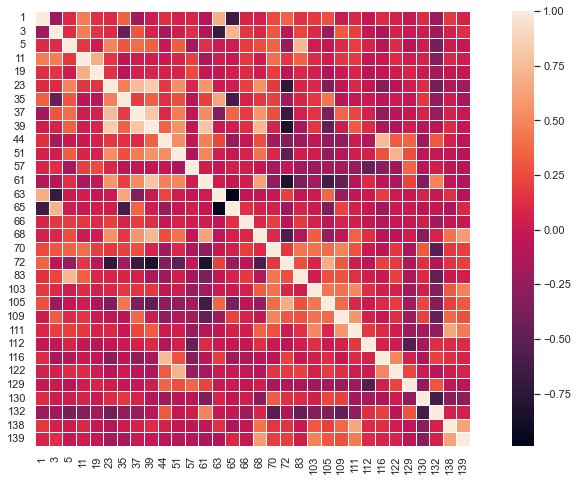

In [6]:
# corr
def find_correlation(df, thresh=0.9): # df: 量化變數資料矩陣


    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # 取下三角矩陣

    already_in = set() # 集合結構避免重複計入相同元素
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist() # Index物件轉為list
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr)) # 更新集合
            perfect_corr.append(col)
            result.append(perfect_corr)

    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


drop_list = find_correlation(X_train_scaler, thresh=0.75)
X_train_corr = X_train_scaler.drop(drop_list, axis=1)
print(X_train_corr.shape)


X_corr2 =X_train_corr.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X_corr2, linewidths=0.5,square=True)

In [7]:
X_val_corr = X_val_scaler.drop(drop_list, axis=1)
X_val_corr

,1,3,5,11,19,23,35,37,39,44,...,109,111,112,116,122,129,130,132,138,139
0,-0.297423,0.093165,-0.806127,-0.655639,-1.521057,-0.306536,0.955018,-0.299960,-0.415826,0.277740,...,-0.681382,-1.254446,-0.652005,-0.058870,-0.767737,0.735693,1.531463,0.470067,0.206254,0.625019
1,1.622220,-0.193919,1.630896,0.859972,0.443598,0.820624,2.120759,0.077009,0.187734,0.002006,...,0.699186,-0.049758,-1.458209,-0.396345,-0.413724,0.762354,0.843112,-1.480348,-0.794883,-1.407029
2,0.990397,-0.582631,0.129532,1.292915,1.251053,0.333173,-0.059782,-1.045975,0.018176,2.212471,...,-2.147650,-0.490693,-0.196018,2.042264,0.384858,0.029705,0.009869,0.281164,-0.579556,-0.609753
3,0.257008,0.529348,0.184555,0.700269,0.527335,0.589635,-0.680967,1.352195,0.723322,-0.073926,...,1.556496,0.610696,-1.325261,-0.754017,-1.335068,0.570252,0.489669,-0.655736,0.682353,0.419917
4,-1.620318,0.998785,0.360879,0.007271,0.794608,0.322723,-1.116391,0.756311,0.723757,-0.970967,...,0.916312,1.748177,0.637237,-1.133737,-1.379941,-1.469291,-1.029838,-0.480494,0.729550,1.812986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,0.559862,-1.019780,0.721494,0.862416,0.614481,1.037558,1.572801,-0.022816,0.289559,-0.625743,...,0.371999,0.197198,-1.609252,-0.837180,-1.068391,0.319928,-0.266551,-1.260405,-0.818604,-0.649868
13458,1.745845,-0.322737,0.784519,1.142376,0.649612,0.403549,0.537982,0.775216,0.831621,2.104119,...,1.159208,1.680206,-1.193178,2.433197,1.359139,0.427176,-2.310876,0.599651,1.472957,-0.404904
13459,-0.128571,1.298837,1.031214,1.212866,0.847555,0.081015,-0.087289,0.658162,0.858926,1.057114,...,0.287211,1.906606,1.562845,1.465071,0.450036,-0.056960,-1.336380,0.476369,1.218831,1.498707
13460,0.849556,0.625451,-0.960163,0.732482,-0.196942,0.081017,-0.414141,0.412588,0.068171,0.345256,...,0.742675,0.179328,-1.772386,0.247241,-0.198459,-0.776529,2.075261,-0.813212,-1.059798,-0.504876


[0.80035137 0.1398623  0.03903195 0.01906262 0.00169176]


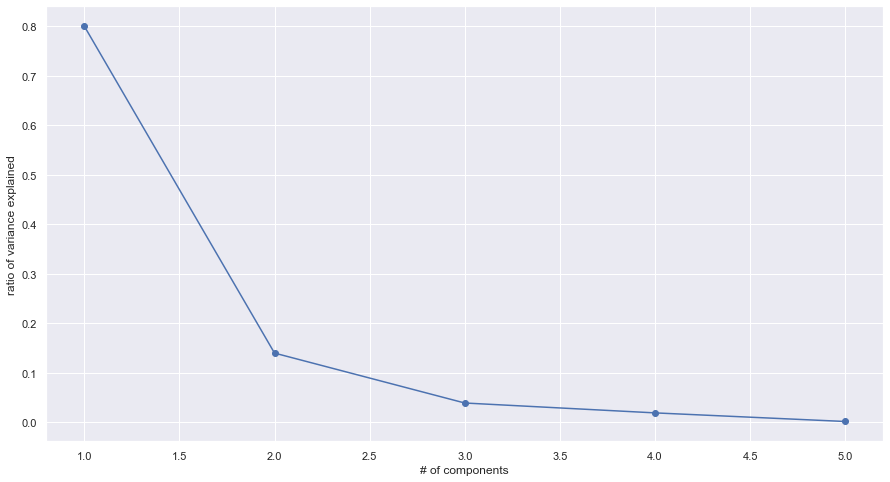

In [8]:
dr = LDA() # Principal Components Analysis 主成份分析，透過矩陣分解decomposition，預設會提取出min(n_samples, n_features)=58主成份，可改成PCA(n_components = 20)

# Step 3&4
# 分數矩陣cell_pca (cell_num 舊空間 -轉軸-> cell_pca 新空間)
X_train_lda = dr.fit_transform(X_train_corr,y_train) # PCA只能針對量化變數計算


# 負荷矩陣
# 前十個主成份與58個原始變數的(線性組合)關係
# dr.components_[:10] # [:10] can be removed.
# type(dr.components_) # numpy.ndarray
# dr.components_.shape # (58主成份, 58原始變量)的方陣

# 陡坡圖(scree plot)決定取幾個主成份
dr.explained_variance_ratio_
print(dr.explained_variance_ratio_)

plt.plot(range(1, 6), dr.explained_variance_ratio_[:5], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')


# 取前7個
dr = LDA(n_components=5)
X_train_lda = dr.fit_transform(X_train_corr,y_train)
X_val_lda=dr.transform(X_val_corr)

In [9]:
model = LogisticRegression(solver="sag", C=1.1)

In [10]:
scores = cross_val_score(model, X_train_lda, y_train, cv=5, scoring='recall_macro')
print(scores)

print("Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))

[0.69663127 0.69404192 0.69719968 0.67756005 0.6995361 ]
Accuracy: 0.692993805537919 (+/- 0.015824579258193625)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lda, y_train, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
recall_w = recall_score(y_test, y_pred,average="macro")
recall_N = recall_score(y_test, y_pred,average=None)


# print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))
print(f"recall:{recall_w}")
print(f"recall:{recall_N}")

accuracy: 0.9484679665738162
con_matrix: 
[[ 441   18   68   93   21    6]
 [  42   51   35    8   27    3]
 [  30   11  777    1   30    8]
 [  16    0    0 8799    0    1]
 [  39   28   34    1   66    1]
 [   4    2   16    8    4   81]]
recall:0.6647399168904903
recall:[0.68160742 0.30722892 0.90665111 0.99807169 0.39053254 0.70434783]


In [12]:
y_pred1 = model.predict(X_val_lda)
con_matrix = confusion_matrix(y_val, y_pred1)
recall_w = recall_score(y_val, y_pred1,average="macro")
print('con_matrix: {}'.format(con_matrix))
print(f"recall:{recall_w}")

con_matrix: [[  558    25    80   111    27    10]
 [   38    68    31    12    35     6]
 [   45    17   980     4    15     7]
 [   14     0     0 11008     0     0]
 [   37    25    52     0   101     1]
 [    4     3    17     4     2   125]]
recall:0.706051868192267
